## Task-1: Perform Image Compression Operations

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
image_path = 'data/picture2.jpg'  
original_image = cv2.imread(image_path)

In [15]:
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

In [ ]:
# Lossy Compression (JPEG)
lossy_image_path = 'data\lossy_image.jpg'
cv2.imwrite(lossy_image_path, original_image, [cv2.IMWRITE_JPEG_QUALITY, 50])  # Quality 50 for compression

# Lossless Compression (PNG)
lossless_image_path = 'data\lossless_image.png'
cv2.imwrite(lossless_image_path, original_image, [cv2.IMWRITE_PNG_COMPRESSION, 9])  # Max compression for PNG

lossy_image = Image.open(lossy_image_path)
lossless_image = Image.open(lossless_image_path)

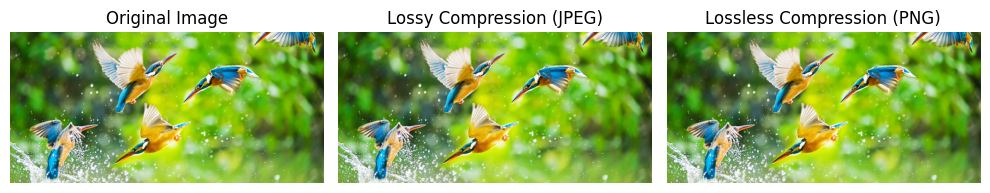

In [ ]:
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.axis('off')

# Lossy Compressed Image (JPEG)
plt.subplot(1, 3, 2)
plt.imshow(lossy_image)
plt.title("Lossy Compression (JPEG)")
plt.axis('off')

# Lossless Compressed Image (PNG)
plt.subplot(1, 3, 3)
plt.imshow(lossless_image)
plt.title("Lossless Compression (PNG)")
plt.axis('off')

plt.tight_layout()
plt.show()

## Task-2: Apply Convolutional Neural Networks (CNN)

### Part 1: Train CNN on the MNIST Dataset

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the dataset
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


d:\Softwares\anaconda3\envs\aiml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8532 - loss: 0.4877 - val_accuracy: 0.9823 - val_loss: 0.0549
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9810 - loss: 0.0602 - val_accuracy: 0.9867 - val_loss: 0.0379
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9878 - loss: 0.0398 - val_accuracy: 0.9875 - val_loss: 0.0373
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9899 - loss: 0.0331 - val_accuracy: 0.9896 - val_loss: 0.0285
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9937 - loss: 0.0211 - val_accuracy: 0.9888 - val_loss: 0.0313
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9941 - loss: 0.0195 - val_accuracy: 0.9912 - val_loss: 0.0267
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9958 - loss: 0.0144 - val_accuracy: 0.9900 - val_loss: 0.0313
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9957 - loss: 0.0133 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


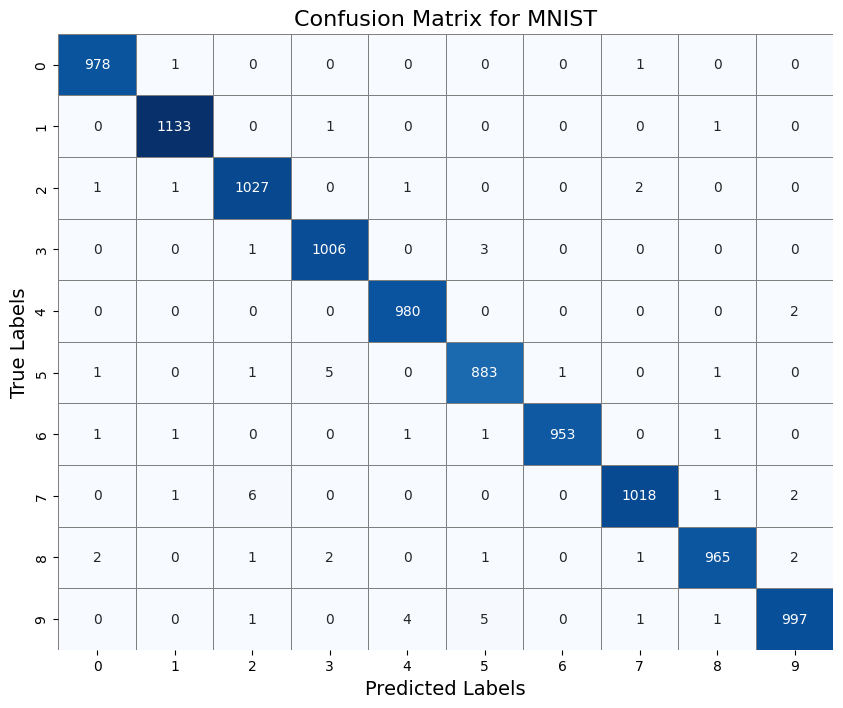

Classification Report:
               precision    recall  f1-score   support

           0     0.9949    0.9980    0.9964       980
           1     0.9965    0.9982    0.9974      1135
           2     0.9904    0.9952    0.9928      1032
           3     0.9921    0.9960    0.9941      1010
           4     0.9939    0.9980    0.9959       982
           5     0.9888    0.9899    0.9894       892
           6     0.9990    0.9948    0.9969       958
           7     0.9951    0.9903    0.9927      1028
           8     0.9948    0.9908    0.9928       974
           9     0.9940    0.9881    0.9911      1009

    accuracy                         0.9940     10000
   macro avg     0.9940    0.9939    0.9939     10000
weighted avg     0.9940    0.9940    0.9940     10000

Accuracy: 99.40%


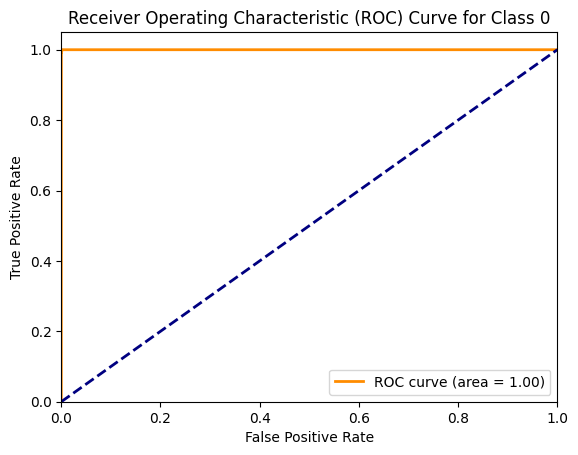

Overall AUC Score: 0.9999


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, confusion_matrix
import numpy as np
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix for MNIST', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# 2. Classification Report 
class_report = classification_report(y_true, y_pred_classes, digits=4)
print("Classification Report:\n", class_report)

# 3. Accuracy
accuracy = np.sum(y_true == y_pred_classes) / len(y_true)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 4. ROC and AUC (one-vs-all for multi-class classification)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for class '0' (you can modify this for other classes)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc[0]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Class 0')
plt.legend(loc="lower right")
plt.show()

auc_score = roc_auc_score(y_test, y_pred, average="macro")
print(f"Overall AUC Score: {auc_score:.4f}")


### Part 2: Train CNN on the CIFAR-10 Dataset

In [ ]:
from keras.datasets import cifar10

(x_train2, y_train2), (x_test2, y_test2) = cifar10.load_data()

# Reshape and normalize the dataset
x_train2 = x_train2.astype('float32') / 255
x_test2 = x_test2.astype('float32') / 255

# Convert labels to one-hot encoding
y_train2= to_categorical(y_train2)
y_test2= to_categorical(y_test2)


In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))  
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


d:\Softwares\anaconda3\envs\aiml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3544 - loss: 1.7845 - val_accuracy: 0.5354 - val_loss: 1.3046
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5694 - loss: 1.2328 - val_accuracy: 0.6284 - val_loss: 1.0817
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6321 - loss: 1.0618 - val_accuracy: 0.6554 - val_loss: 1.0092
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6672 - loss: 0.9651 - val_accuracy: 0.6607 - val_loss: 0.9881
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6901 - loss: 0.9002 - val_accuracy: 0.6777 - val_loss: 0.9341
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7140 - loss: 0.8249 - val_accuracy: 0.6847 - val_loss: 0.9252
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7285 - loss: 0.7912 - val_accuracy: 0.6975 - val_loss: 0.8934
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7483 - loss: 0.7277 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


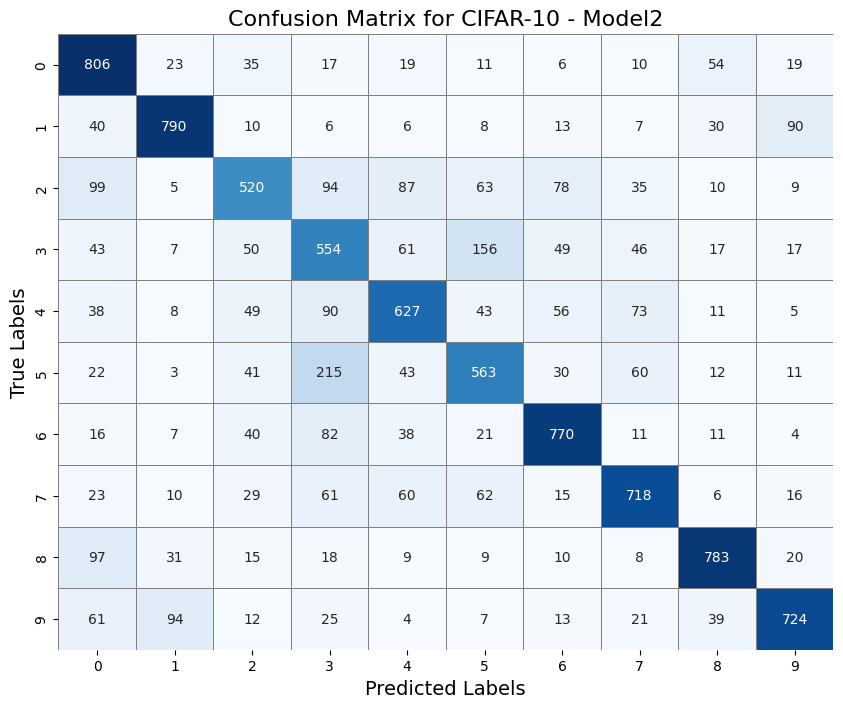

Classification Report:
               precision    recall  f1-score   support

           0     0.6474    0.8060    0.7180      1000
           1     0.8078    0.7900    0.7988      1000
           2     0.6492    0.5200    0.5775      1000
           3     0.4768    0.5540    0.5125      1000
           4     0.6572    0.6270    0.6418      1000
           5     0.5970    0.5630    0.5795      1000
           6     0.7404    0.7700    0.7549      1000
           7     0.7260    0.7180    0.7220      1000
           8     0.8047    0.7830    0.7937      1000
           9     0.7913    0.7240    0.7561      1000

    accuracy                         0.6855     10000
   macro avg     0.6898    0.6855    0.6855     10000
weighted avg     0.6898    0.6855    0.6855     10000

Accuracy: 68.55%


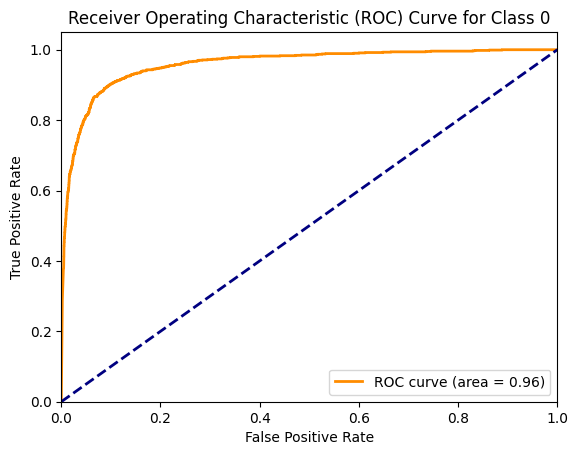

Overall AUC Score: 0.9459


In [25]:
# Predict on the test set
y_pred2 = model2.predict(x_test2)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(y_test2, axis=1)

# 1. Confusion Matrix
conf_matrix2 = confusion_matrix(y_true2, y_pred_classes2)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix for CIFAR-10 - Model2', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# 2. Classification Report (includes Precision, Recall, F1-score)
class_report2 = classification_report(y_true2, y_pred_classes2, digits=4)
print("Classification Report:\n", class_report2)

# 3. Accuracy
accuracy2 = np.sum(y_true2 == y_pred_classes2) / len(y_true2)
print(f"Accuracy: {accuracy2 * 100:.2f}%")

# 4. ROC and AUC (one-vs-all for multi-class classification)
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()

for i in range(10):  # 10 classes for CIFAR-10
    fpr2[i], tpr2[i], _ = roc_curve(y_test2[:, i], y_pred2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Plot ROC Curve for class '0' (you can modify this for other classes)
plt.figure()
plt.plot(fpr2[0], tpr2[0], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc2[0]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Class 0')
plt.legend(loc="lower right")
plt.show()

# Overall AUC Score
auc_score2 = roc_auc_score(y_test2, y_pred2, average="macro")
print(f"Overall AUC Score: {auc_score2:.4f}")
